#### Some notes

Drawdown - The period during which, generally, the S&P index has a drawdown of 15% or more

Recovery - An economic recovery is the phase of the business cycle following a recession, during which an economy regains and exceeds peak employment and output levels prior to downturn

Recession period : Drawdown period + recovery period

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, date, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [215]:
snp= pd.read_csv("/Users/amrita/Desktop/SEM 2/Analytics in Practice/Recession /^GSPC.csv")

In [216]:
snp

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
1,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
3,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
4,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000
...,...,...,...,...,...,...,...
5095,2020-04-03,2514.919922,2538.179932,2459.959961,2488.649902,2488.649902,6087190000
5096,2020-04-06,2578.280029,2676.850098,2574.570068,2663.679932,2663.679932,6391860000
5097,2020-04-07,2738.649902,2756.889893,2657.669922,2659.409912,2659.409912,7040720000
5098,2020-04-08,2685.000000,2760.750000,2663.300049,2749.979980,2749.979980,5856370000


In [217]:
snp['Date']=pd.to_datetime(snp['Date'])

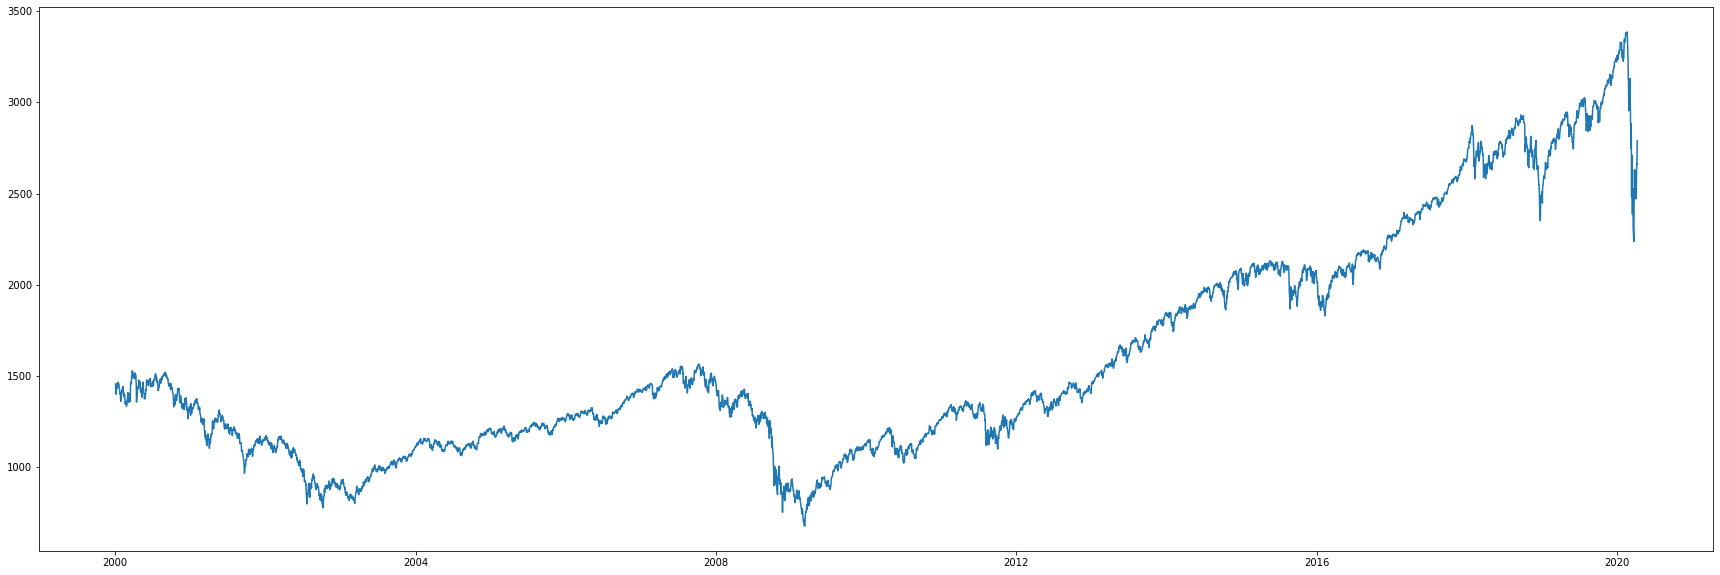

In [218]:
plt.figure(figsize=(30,10))
plt.plot(snp['Date'],snp['Adj Close'])

In [219]:
#Calculate the max drawdown in the past days for each day in the series
snp['roll_max'] = snp['Adj Close'].cummax()   # peak
snp['daily_drawdown'] = snp['Adj Close']/snp['roll_max'] - 1.0   # how much drawdown each day has from the peak

# Next we calculate the minimum (negative) daily drawdown for each day 
snp['max_daily_drawdown'] = snp['daily_drawdown'].cummin()   # min drawdown in the past days

In [220]:
snp

,Date,Open,High,Low,Close,Adj Close,Volume,roll_max,daily_drawdown,max_daily_drawdown
0,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000,1455.219971,0.000000,0.000000
1,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000,1455.219971,-0.038345,-0.038345
2,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000,1455.219971,-0.036496,-0.038345
3,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000,1455.219971,-0.035575,-0.038345
4,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000,1455.219971,-0.009449,-0.038345
...,...,...,...,...,...,...,...,...,...,...
5095,2020-04-03,2514.919922,2538.179932,2459.959961,2488.649902,2488.649902,6087190000,3386.149902,-0.265050,-0.567754
5096,2020-04-06,2578.280029,2676.850098,2574.570068,2663.679932,2663.679932,6391860000,3386.149902,-0.213360,-0.567754
5097,2020-04-07,2738.649902,2756.889893,2657.669922,2659.409912,2659.409912,7040720000,3386.149902,-0.214621,-0.567754
5098,2020-04-08,2685.000000,2760.750000,2663.300049,2749.979980,2749.979980,5856370000,3386.149902,-0.187874,-0.567754


In [221]:
snp['roll_max']

0       1455.219971
1       1455.219971
2       1455.219971
3       1455.219971
4       1455.219971
           ...     
5095    3386.149902
5096    3386.149902
5097    3386.149902
5098    3386.149902
5099    3386.149902
Name: roll_max, Length: 5100, dtype: float64

In [222]:
snp['daily_drawdown']

0       0.000000
1      -0.038345
2      -0.036496
3      -0.035575
4      -0.009449
          ...   
5095   -0.265050
5096   -0.213360
5097   -0.214621
5098   -0.187874
5099   -0.176109
Name: daily_drawdown, Length: 5100, dtype: float64

In [223]:
snp['max_daily_drawdown']

0       0.000000
1      -0.038345
2      -0.038345
3      -0.038345
4      -0.038345
          ...   
5095   -0.567754
5096   -0.567754
5097   -0.567754
5098   -0.567754
5099   -0.567754
Name: max_daily_drawdown, Length: 5100, dtype: float64

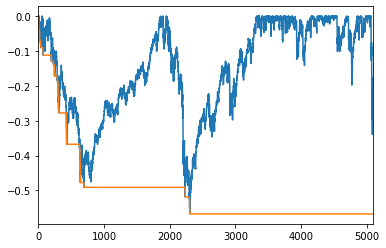

In [224]:
snp['daily_drawdown'].plot()
snp['max_daily_drawdown'].plot()
#pp.show()

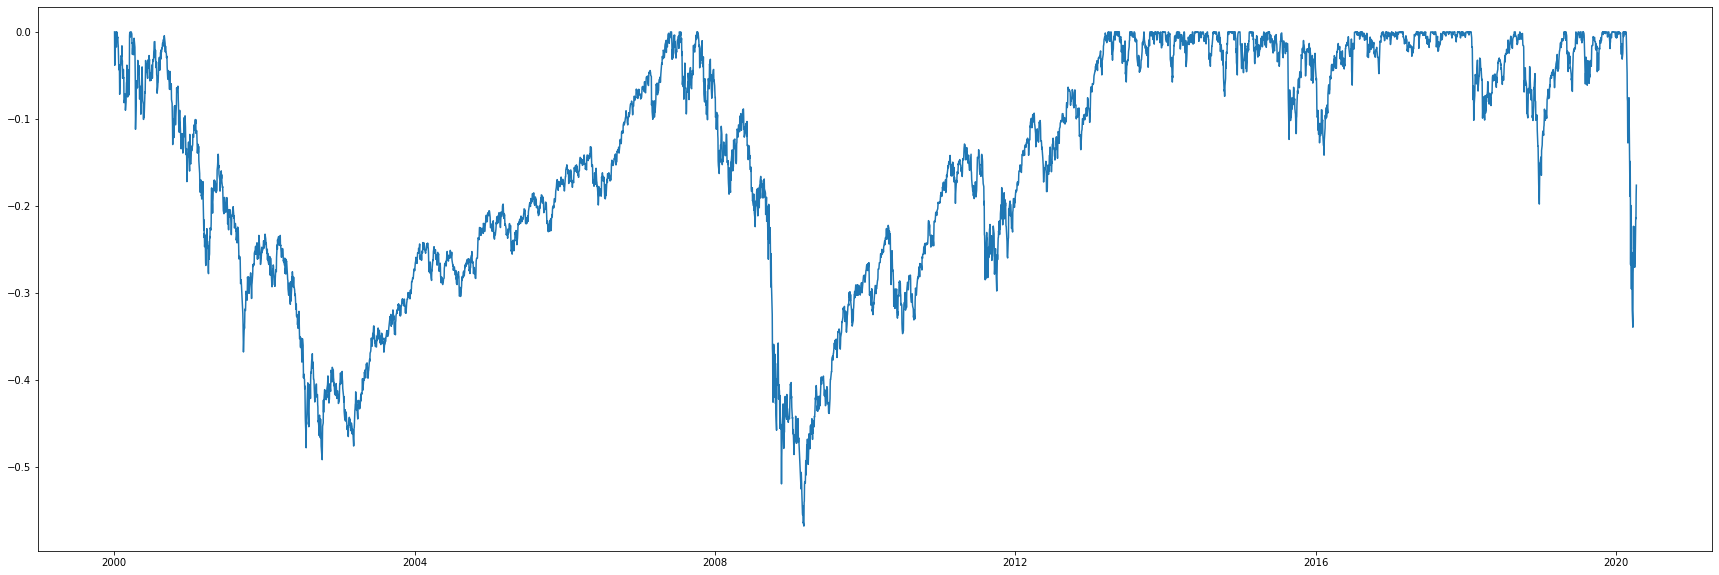

In [225]:
plt.figure(figsize=(30,10))
plt.plot(snp['Date'],snp['daily_drawdown'])

In [226]:
snpdate_less_than15 = snp[snp['daily_drawdown'] <= -0.15]['Date']
snpdd_less_than15 = snp[snp['daily_drawdown'] <= -0.15]['daily_drawdown']

In [227]:
snpdate_less_than15.isnull().values.any()

False

In [228]:
snpdate_less_than15.describe()

count                    2302
unique                   2302
top       2005-07-12 00:00:00
freq                        1
first     2000-12-20 00:00:00
last      2020-04-09 00:00:00
Name: Date, dtype: object

In [229]:
#converting datetime to string type so that we get only the date part
rec_date=[]
rec_string=[]
for i in snpdate_less_than15:
    rec = i.strftime('%m-%d-%Y')
    rec_string.append(rec)                  # list of recession dates in string format

rec_string
for i in rec_string:
    rec =datetime.strptime(i,'%m-%d-%Y').date()
    rec_date.append(rec)                        # list of recession dates in datetime format

In [230]:
#calculating recession periods
rec_period=[]
temp = rec_date[0]

for j in range(0,len(rec_date)-1):
    if (rec_date[j+1] - rec_date[j]) > timedelta(days = 365):
#         if abs(temp - rec_date[j]) > timedelta(days=120):   # to exclude the 2019 dec to 2019 jan recession period (noise)
        rec_period.append((temp,rec_date[j]))
        temp= rec_date[j+1]    
        
rec_period.append((temp,rec_date[-1]) )        # to capture the recent recession period 2020

In [231]:
rec_period

[(datetime.date(2000, 12, 20), datetime.date(2006, 9, 7)),
 (datetime.date(2008, 1, 18), datetime.date(2012, 6, 28)),
 (datetime.date(2018, 12, 20), datetime.date(2019, 1, 3)),
 (datetime.date(2020, 3, 9), datetime.date(2020, 4, 9))]

# Recession plot

In [71]:
snp_dd = snpdd_less_than15.values   # drawdown values less than or equal to 15%
snp_dd = list(snp_dd)
snpdate= snpdate_less_than15.values
snpdate = list(snpdate)

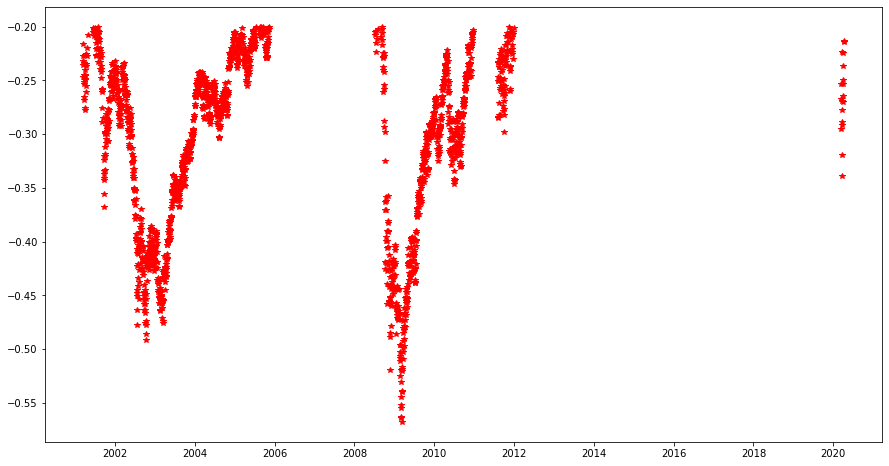

In [72]:
#recession periods


plt.figure(figsize=(15,8))
# x = snp['Date']
# y = snp['Adj Close']
# plt.plot(x,y, 'bo-')
plt.plot(snpdate,snp_dd, 'r*')
plt.show()


# Using Vix to identify recovery period

#### Vix Index, also known as 'fear gauge', measures volatility of the market and the risk associated with it. 
1. High VIX readings mean investors see significant risk that the market will move sharply, whether downward or upward
2. It is usually higher during recession period as compared to other times.

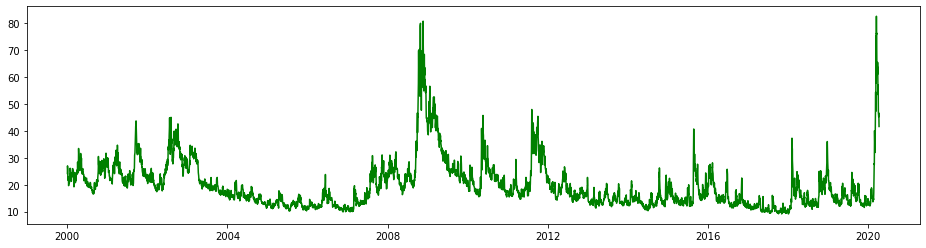

In [255]:
VIX_before2004 = pd.read_excel('http://www.cboe.com/publish/scheduledtask/mktdata/datahouse/vixarchive.xls',header = 1)
VIX_after2004 = pd.read_csv('http://www.cboe.com/publish/scheduledtask/mktdata/datahouse/vixcurrent.csv', header = 1)
VIX = pd.concat([VIX_before2004, VIX_after2004]).reset_index()
del VIX['index']
VIX = VIX[['Date', 'VIX Close']]
VIX['Date'] = pd.to_datetime(VIX['Date'])
VIX = VIX[VIX['Date'] >= snp.loc[0, 'Date']]

plt.figure(figsize=(16,4))
plt.plot(VIX['Date'],VIX['VIX Close'], 'g')



In [253]:
VIX

,Date,VIX Close
2526,2000-01-03,24.21
2527,2000-01-04,27.01
2528,2000-01-05,26.41
2529,2000-01-06,25.73
2530,2000-01-07,21.72
...,...,...
7623,2020-04-03,46.80
7624,2020-04-06,45.24
7625,2020-04-07,46.70
7626,2020-04-08,43.35


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  This is separate from the ipykernel package so we can avoid doing imports until


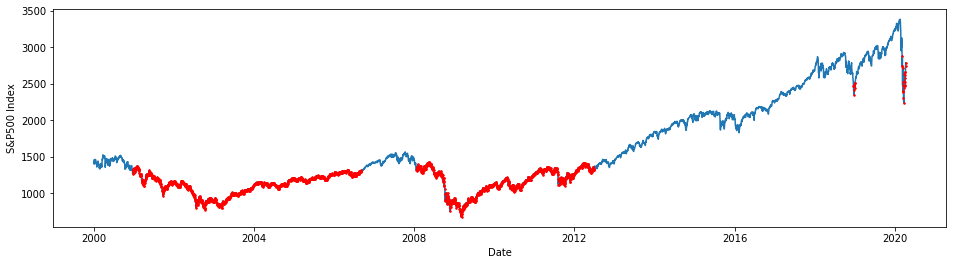

In [283]:
rec_index = list()
for (x, y) in rec_period:
    rec_index.extend([z for z in range(snp[snp['Date'] == x].index[0],snp[snp['Date'] == y].index[0]+1)])

fig = plt.figure(figsize=(16,4))    
ax1 = fig.add_subplot(111)
p1, = ax1.plot(snp['Date'],snp['Adj Close'],marker='.', markerfacecolor='r',markeredgecolor='r', markersize=3 ,markevery=rec_index)
ax1.set_ylabel('S&P500 Index')
ax1.set_xlabel('Date')
# ax2 = ax1.twinx()
# p2, = ax2.plot(VIX['Date'],VIX['VIX Close'],'g')
# ax2.set_ylabel('VIX index')

# ax1.yaxis.label.set_color(p1.get_color())
# ax2.yaxis.label.set_color(p2.get_color())

# ax1.tick_params(axis='y', colors=p1.get_color())
# ax2.tick_params(axis='y', colors=p2.get_color())

plt.show()


